# Intro:
## Studying the difference between different distance metric and different k values in 
## K Neighbors Classifier

## Importing the needed libraries and functions

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Loading the dataset

In [2]:
data = sns.load_dataset('iris')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Shuffling the data to take random set for training and testing for only one time an saving the shiffeld dataset
### The random set for unbiased set

## Note
### Run this cell only one time

In [4]:
data = data.sample(frac=1).reset_index(drop=True)
data.to_csv('iris150.csv',index = False, header=True)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.7,3.1,4.7,1.5,versicolor
1,6.6,3.0,4.4,1.4,versicolor
2,4.6,3.2,1.4,0.2,setosa
3,6.3,2.3,4.4,1.3,versicolor
4,4.6,3.6,1.0,0.2,setosa


## Then read data from here

In [5]:
data = pd.read_csv('iris150.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.7,3.1,4.7,1.5,versicolor
1,6.6,3.0,4.4,1.4,versicolor
2,4.6,3.2,1.4,0.2,setosa
3,6.3,2.3,4.4,1.3,versicolor
4,4.6,3.6,1.0,0.2,setosa


## Spliting data into training and test data where test data =30%

In [6]:
training = data [:105]
test = data[105:]

## Creating feature , target and test variables

In [7]:
features = list(zip(training['sepal_length'], training['sepal_width'], 
                    training['petal_length'], training['petal_width']))

target = list(training['species'])

testValues = list(zip(test['sepal_length'], test['sepal_width'],
                      test['petal_length'], test['petal_width']))

## Generating a k-NN model using K=7 neighbors’ values & The default metric is minkowski, with p=2 is equivalent to the standard Euclidean metric
## and fiting the data into the model

In [8]:
model1 = KNeighborsClassifier(n_neighbors= 7)
model1.fit(features,target);

## Testing the model using the test dataset that we made and adding the result to the test DataFrame

In [9]:
def addTestCol(model,col_name):
    '''
    Taking the model and new data frame column name
    predicting all test values using the input model and
    inserting the predicted results in the test data frame with the input column  name
    '''
    predictedTest = []
    for i in testValues:
        predictedTest.append(str(model.predict([(i)])).strip('[').strip(']').strip("'"))
        
    test.insert(test.shape[1], col_name,predictedTest)

In [10]:
addTestCol(model1,'predicted_m1')    

In [11]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_m1
105,6.3,3.4,5.6,2.4,virginica,virginica
106,4.8,3.1,1.6,0.2,setosa,setosa
107,6.8,3.2,5.9,2.3,virginica,virginica
108,4.9,2.5,4.5,1.7,virginica,versicolor
109,6.3,2.7,4.9,1.8,virginica,virginica


## Calculating the accuracy for the K-nn model using k = 7,  metric = Euclidean  

In [12]:
def accuracy (modelColName):
    '''
    Taking model column name in the test D.F and
    calculating the accuracy of that model
    '''
    acc = (test.query('species == {}'.format(modelColName)).shape[0] / test.shape[0]) * 100
    return acc

In [13]:
acc1 = accuracy('predicted_m1')
acc1

93.33333333333333

## Generating a k-NN model using K=7 neighbors’ values  metric  = Manhattan
## and fiting the data into the model

In [14]:
model_m = KNeighborsClassifier(n_neighbors= 7, metric = 'manhattan')
model_m.fit(features,target);

## Calculating the accuracy of the model

In [15]:
addTestCol(model_m,'predicted_m2')
acc2 = accuracy('predicted_m2')
acc2

93.33333333333333

In [16]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_m1,predicted_m2
105,6.3,3.4,5.6,2.4,virginica,virginica,virginica
106,4.8,3.1,1.6,0.2,setosa,setosa,setosa
107,6.8,3.2,5.9,2.3,virginica,virginica,virginica
108,4.9,2.5,4.5,1.7,virginica,versicolor,versicolor
109,6.3,2.7,4.9,1.8,virginica,virginica,virginica


## Visualising the difference

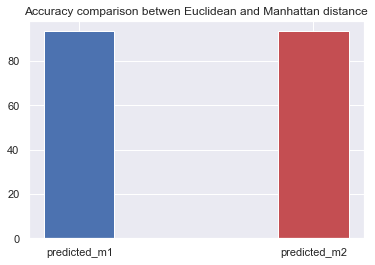

In [17]:
plt.title('Accuracy comparison betwen Euclidean and Manhattan distance')
plt.bar(x =['predicted_m1','predicted_m2'],height = [acc1,acc2],width=0.3,color = ['b','r']);

## creating a list of different models with k in range[1:45] and euclidean distance and ploting the results

In [18]:
Nmodels = []
accList = []
for i in range (45):
    Nmodels.append(KNeighborsClassifier(n_neighbors = i+1))
    Nmodels[i].fit(features,target)
    addTestCol(Nmodels[i],f'k{i+1}')
    acc = accuracy(f'k{i+1}')
    accList.append(acc)

In [19]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_m1,predicted_m2,k1,k2,k3,...,k36,k37,k38,k39,k40,k41,k42,k43,k44,k45
105,6.3,3.4,5.6,2.4,virginica,virginica,virginica,virginica,virginica,virginica,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
106,4.8,3.1,1.6,0.2,setosa,setosa,setosa,setosa,setosa,setosa,...,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa
107,6.8,3.2,5.9,2.3,virginica,virginica,virginica,virginica,virginica,virginica,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
108,4.9,2.5,4.5,1.7,virginica,versicolor,versicolor,versicolor,versicolor,versicolor,...,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor
109,6.3,2.7,4.9,1.8,virginica,virginica,virginica,virginica,virginica,virginica,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica


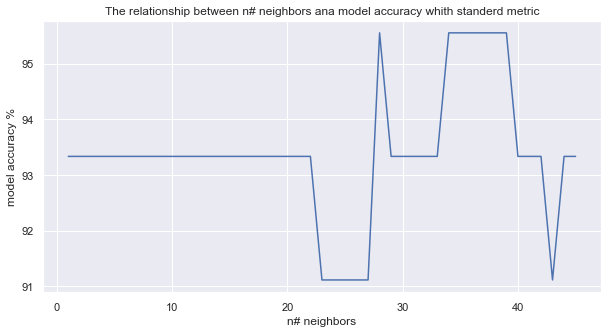

In [20]:
plt.figure(figsize=(10,5))
plt.title('The relationship between n# neighbors ana model accuracy whith standerd metric')
plt.xlabel('n# neighbors')
plt.ylabel('model accuracy %')
plt.plot([x for x in range(1,46)],accList,'b');

## creating a list of different models with k in range[1:45] and manhattan distance and ploting the results

In [21]:
Nmodels_m = []
accList_m = []
for i in range (45):
    Nmodels_m.append(KNeighborsClassifier(n_neighbors = i+1, metric='manhattan'))
    Nmodels_m[i].fit(features,target)
    addTestCol(Nmodels_m[i],f'k_m{i+1}') # _m standes for manhattan
    acc = accuracy(f'k_m{i+1}')
    accList_m.append(acc)

In [22]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_m1,predicted_m2,k1,k2,k3,...,k_m36,k_m37,k_m38,k_m39,k_m40,k_m41,k_m42,k_m43,k_m44,k_m45
105,6.3,3.4,5.6,2.4,virginica,virginica,virginica,virginica,virginica,virginica,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
106,4.8,3.1,1.6,0.2,setosa,setosa,setosa,setosa,setosa,setosa,...,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa
107,6.8,3.2,5.9,2.3,virginica,virginica,virginica,virginica,virginica,virginica,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
108,4.9,2.5,4.5,1.7,virginica,versicolor,versicolor,versicolor,versicolor,versicolor,...,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor
109,6.3,2.7,4.9,1.8,virginica,virginica,virginica,virginica,virginica,virginica,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica


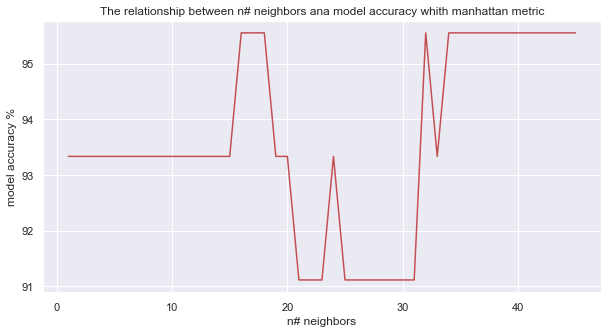

In [23]:
plt.figure(figsize=(10,5))
plt.title('The relationship between n# neighbors ana model accuracy whith manhattan metric')
plt.xlabel('n# neighbors')
plt.ylabel('model accuracy %')
plt.plot([x for x in range(1,46)],accList_m , color = 'r');

## Ploting the results between Manhattan and Euclidean distance

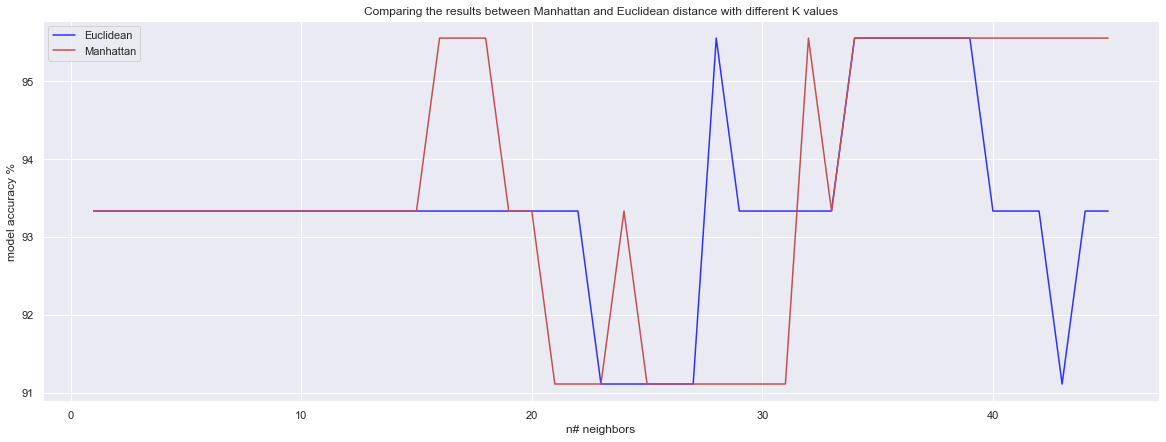

In [24]:
plt.figure(figsize=(20,7))
plt.title('Comparing the results between Manhattan and Euclidean distance with different K values')
plt.xlabel('n# neighbors')
plt.ylabel('model accuracy %')
plt.plot([x for x in range(1,46)],accList,'blue',alpha = 0.8)
plt.plot([x for x in range(1,46)],accList_m , color = 'r')
plt.legend(['Euclidean','Manhattan']);